##**Tải data vào colab**

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
!unzip /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/emotions_data.zip -d "/content/"

Archive:  /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/emotions_data.zip
replace /content/images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## **Import thư viện**

In [33]:
import glob
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import seaborn as sn

## **Load data và preprocessing**

In [34]:
train_dir = '/content/images/train'
test_dir = '/content/images/validation'
categories = ["happy", "fear"]
img_size = 50

In [75]:
X_train_label = []
X_train_list = []
X_test_label = []
X_test_list = []

*- Tập train*

In [76]:
happy_train_list = glob.glob(train_dir+"/"+categories[0]+"/*")
fear_train_list = glob.glob(train_dir+"/"+categories[1]+"/*")
for name in happy_train_list:
  X_train_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))
for name in fear_train_list:
  X_train_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))

*- Tập test*

In [77]:
happy_test_list = glob.glob(test_dir+"/"+categories[0]+"/*")
fear_test_list = glob.glob(test_dir+"/"+categories[1]+"/*")
for name in happy_test_list:
  X_test_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))
for name in fear_test_list:
  X_test_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))

## **Chia dữ liệu thành tập train và test**

In [78]:
X_train = np.array(X_train_list)
y_train = np.array(X_train_label)

print(X_train.shape)
print(y_train.shape)

(11267, 50, 50)
(11267,)


In [79]:
X_test = np.array(X_test_list)
y_test = np.array(X_test_label)

print(X_test.shape)
print(y_test.shape)

(2843, 50, 50)
(2843,)


## **Duỗi vector, chuẩn hoá input**

In [80]:
X_train_scaled = np.array([x.ravel()/255. for x in X_train])
X_test_scaled = np.array([x.ravel()/255. for x in X_test])

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(11267, 2500)
(2843, 2500)


## **Chuẩn hoá output**

In [81]:
y_train_scaled = np.array([y for y in y_train])
y_test_scaled = np.array([y for y in y_test])
print(y_train_scaled.shape)

(11267,)


In [42]:
# Hàm sigmoid
def g(z):
  z = np.float64(z)
  return np.exp(z)/(1+np.exp(z))
# Hàm xác suất dự đoán
def predict_prob(X,w):
  z = np.dot(X,w)
  a = g(z)
  return a
# Hàm dự đoán binary
def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >=0.5] =1
  y_hat[y_hat <0.5]=0
  return y_hat
# Hàm loss
def loss(X,y,w):
  y_hat = predict_prob(X,w)
  theta=1e-4
  l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
  return -np.mean(l)

In [43]:
# Hàm gradient
def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw

In [44]:
# Hàm gradient descent
def gradient_descent(X,y,lr =1e-7,epochs = 5000):
  w = np.zeros((X.shape[1],1))
  losses = []
  for i in range(epochs):
    dw = grad(X,y,w)
    w -= lr*dw
    a = loss(X,y,w)
    losses.append(a)
  return losses,w

In [45]:
print(X_train_scaled)
# print(np.array([y_train]).T)
print(np.array([y_train_scaled]).T)
print(X_train_scaled.shape)
print(np.array([y_train_scaled]).T.shape)

[[0.49019608 0.61960784 0.6745098  ... 0.45490196 0.42745098 0.41176471]
 [0.86666667 0.85490196 0.85098039 ... 0.38823529 0.42352941 0.4627451 ]
 [0.67843137 0.78431373 0.78431373 ... 0.45882353 0.41960784 0.36470588]
 ...
 [0.82745098 0.82745098 0.82745098 ... 0.05098039 0.03921569 0.05098039]
 [0.6        0.61960784 0.6        ... 0.26666667 0.27058824 0.27843137]
 [0.36862745 0.44313725 0.51372549 ... 0.05882353 0.02745098 0.02745098]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
(11267, 2500)
(11267, 1)


### **Vẽ đồ thị Loss ban đầu**

In [16]:
loss,w = gradient_descent(X_train_scaled,np.array([y_train_scaled]).T)

Text(0, 0.5, 'loss')

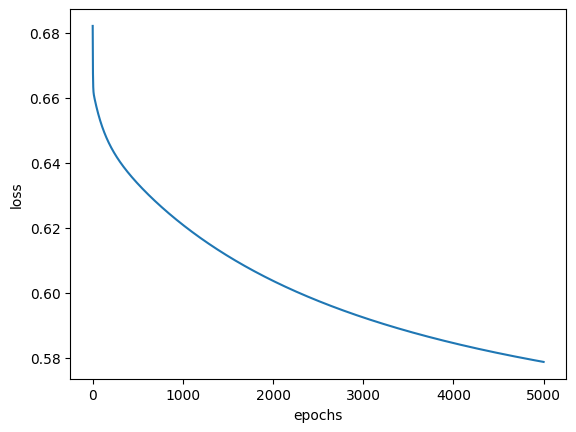

In [17]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")

In [18]:
# Tính y dự đoán
y_hat = predict(X_test_scaled,w)

## **Hàm đánh giá**

In [19]:
def evaluation(y_true, y_pred):
    tp = tn = fp = fn = 0 
    # So sánh y_true và y_pred
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1: 
            tp += 1 
        elif y_true[i] == 0 and y_pred[i] == 0: 
            tn += 1 
        elif y_true[i] == 0 and y_pred[i] == 1: 
            fp += 1 
        elif y_true[i] == 1 and y_pred[i] == 0: 
            fn += 1 
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    # Tính true positive, true negative, false positive, false negative
    print(f"tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn}")
    # Tính Accuracy, Precision, Recall, F1 score
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 Score = {f1_score}")

### **Đánh giá accuracy, recall, precision, f1-score**

In [20]:
evaluation(y_test, y_hat)

tp = 369, tn = 1661, fp = 164, fn = 649
Accuracy = 0.7140344706296166
Precision = 0.6923076923076923
Recall = 0.362475442043222
F1 Score = 0.4758220502901353


# **Ứng dụng phương pháp regularization L2 vào mô hình**

In [21]:
# Hàm sigmoid
def g(z):
    z = np.float64(z)
    return np.exp(z)/(1+np.exp(z))
# Hàm xác suất dự đoán
def predict_prob(X, w):
    z = np.dot(X, w)
    a = g(z)
    return a
# Hàm dự đoán binary
def predict(X, w):
    y_hat = predict_prob(X, w)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat
# Hàm loss, có bổ sung L2 regularization
def loss(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    theta = 1e-4
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    l2 = lambda_ * np.sum(w**2)
    return -np.mean(l) + l2/(2*X.shape[0])
# Hàm gradient, có bổ sung L2 regularization
def grad(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw
# Hàm gradient descent
def gradient_descent(X, y, lr=1e-7, epochs=5000, lambda_=1e-3):
    w = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(epochs):
        dw = grad(X, y, w, lambda_)
        w -= lr * dw
        a = loss(X, y, w, lambda_)
        losses.append(a)
    return losses, w

### **Vẽ đồ thị Loss mới**

In [22]:
loss,w = gradient_descent(X_train_scaled,np.array([y_train_scaled]).T)

Text(0, 0.5, 'loss')

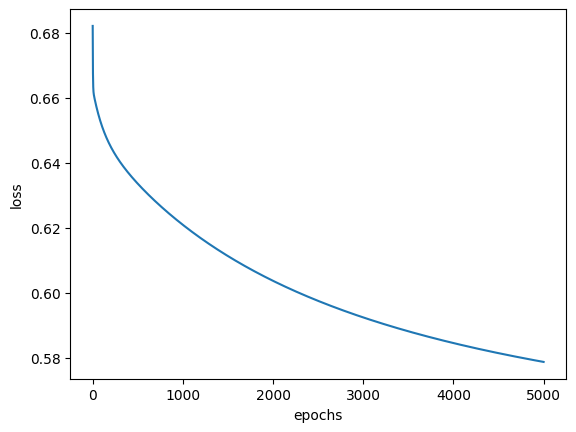

In [23]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")

In [24]:
# Tính y dự đoán
y_hat = predict(X_test_scaled,w)

### **Đánh giá accuracy, recall, precision, f1-score**

In [25]:
evaluation(y_test, y_hat)

tp = 369, tn = 1661, fp = 164, fn = 649
Accuracy = 0.7140344706296166
Precision = 0.6923076923076923
Recall = 0.362475442043222
F1 Score = 0.4758220502901353


## **Vẽ confusion matrix dùng thư viện sklearn**



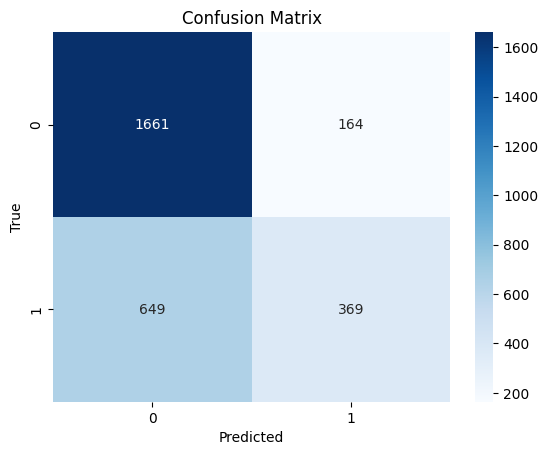

In [26]:
import sklearn.metrics

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Code và thực thi hàm batch_generator tối ưu hàm loss**

In [27]:
def batch_generator(X, y, batch_size):
    # Chia nhiều batches để huấn luyện
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    n_batch = len(idx) // batch_size
    for i in range(n_batch):
        i_start = i * batch_size
        i_stop = min((i + 1) * batch_size, len(idx))
        yield X[idx[i_start:i_stop], :], y[idx[i_start:i_stop],:]

# Hàm sigmoid
def g(z):
    z = np.float64(z)
    return np.exp(z) / (1 + np.exp(z))

# Hàm xác suất dự đoán
def predict_prob(X, w):
    z = np.dot(X, w)
    a = g(z)
    return a

# Hàm dự đoán binary
def predict(X, w):
    y_hat = predict_prob(X, w)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

# Hàm loss, có bổ sung L2 regularization
def loss(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    theta = 1e-4
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    l2 = lambda_ * np.sum(w**2)
    return -np.mean(l) + l2/(2*X.shape[0])

# Hàm gradient
def grad(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw

# Hàm gradient descent
def gradient_descent(X, y, lr=1e-6, epochs=1000, lambda_=0.1):
    w = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(epochs):
        for X_batch, y_batch in batch_generator(X, y, batch_size):
            dw = grad(X_batch, y_batch, w, lambda_)
            w -= lr * dw
        a = loss(X, y, w, lambda_)
        losses.append(a)
        # print(losses[-1])
    return losses, w

batch_size = 100
lr = 1e-7
epochs =5000
lambda_ = 0.1
losses, weight = gradient_descent(X_train_scaled, np.array([y_train_scaled]).T, lr, epochs, lambda_)

print("Final loss:", losses[-1])

Final loss: 0.5788001336834812


Text(0, 0.5, 'loss')

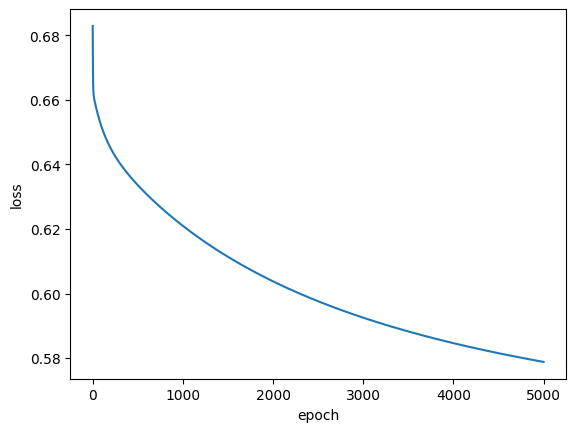

In [28]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [82]:
y_pred = predict(X_test_scaled, weight)
evaluation(y_test_scaled, y_pred)

tp = 369, tn = 1662, fp = 163, fn = 649
Accuracy = 0.7143862117481533
Precision = 0.693609022556391
Recall = 0.362475442043222
F1 Score = 0.47612903225806447


# **Hàm binary1 bổ sung bias**

In [63]:
class binary1:
    def __init__(self, lr = 1e-6, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
    # Hàm thêm bias vào tập X
    def addBias(self,X):
        bias = np.ones((X.shape[0],1))
        X = np.hstack((bias,X));
        return X
    # Hàm sigmoid
    def g(z):
        z = np.float64(z)
        return np.exp(z)/(1+np.exp(z))
    # Hàm xác suất dự đoán
    def predict_prob(self,X, w):
        z = np.dot(X, w)
        a = g(z)
        return a
    # Hàm dự đoán binary
    def predict(self,X, w):
        y_hat = self.predict_prob(X, w)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat
    # Hàm loss
    def loss(self,X, y, w, lambda_):
        y_hat = self.predict_prob(X, w)
        theta = 1e-4
        l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
        return -np.mean(l)
    # Hàm gradient
    def grad(self,X, y, w, lambda_):
        y_hat = self.predict_prob(X, w)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw
    # Hàm gradient descent
    def gradient_descent(self,X, y, lr=1e-7, epochs=5000, lambda_=0.01):
        w = np.zeros((X.shape[1], 1))
        losses = []
        for i in range(epochs):
            dw = self.grad(X, y, w, lambda_)
            w -= lr * dw
            a = self.loss(X, y, w, lambda_)
            losses.append(a)
        return losses, w

In [ ]:
model = binary1()
X_train_scaled_bias = model.addBias(X_train_scaled)
X_test_scaled_bias = model.addBias(X_test_scaled)
loss,w = model.gradient_descent(X_train_scaled_bias,np.array([y_train_scaled]).T)

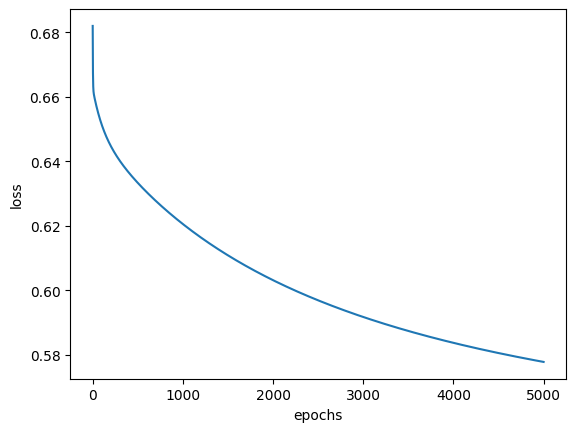

In [70]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss)

In [71]:
print(f"Final loss: {loss[-1]}")

Final loss: 0.577749061553835


# **Đánh giá mô hình sau khi thêm bias**

In [66]:
y_pred = model.predict(X_test_scaled_bias,w)

In [68]:
evaluation(y_test_scaled,y_pred)

tp = 368, tn = 1665, fp = 160, fn = 650
Accuracy = 0.7150896939852269
Precision = 0.696969696969697
Recall = 0.3614931237721022
F1 Score = 0.4760672703751617
